In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_1.ipynb   ARO2.ipynb		 'R911R912 _明志蔡教授_R2.xlsx'
 ARO1.ipynb    'R911R912 _ARO1_R2.xlsx'
 ARO2_1.ipynb   R911R912.pptx


In [2]:
import pandas as pd
path = "R911R912 _ARO1_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料',
 'R911R912_TAG相關錶點資料(停用)']

In [3]:
df = xls.parse(sheets[1])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98102_1,ARO1-DCS-FIC_98102_1.RESULT,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98302_1.RESULT,ARO1-DCS-FIC_98401_1,ARO1-DCS-FIC_98401_1.RESULT,ARO1-DCS-FIC_98403_1,ARO1-DCS-FIC_98403_1.RESULT,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-DCS-FIC_92001_1.RESULT,ARO1-DCS-FIC_91101_2,ARO1-DCS-FIC_91102_2,ARO1-DCS-FIC_91105_2,ARO1-DCS-FIC_91106_2,ARO1-DCS-FIC_91201_2,ARO1-DCS-FIC_91202_2,ARO1-DCS-FIC_91204_2,ARO1-DCS-FIC_91205_2,ARO1-DCS-FIC_98103_2,ARO1-DCS-FI_98104,ARO1-DCS-PI99801,ARO1-DCS-PDI98301A,ARO1-DCS-PDI98301,ARO1-DCS-PDI98401A,ARO1-DCS-PDI98401,ARO1-DCS-PIC_91103_2,ARO1-DCS-PIC_91203_2,ARO1-DCS-PIC_98104,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-DCS-AC_CTIME,ARO1-DCS-AC_STIME,ARO1-DCS-AC_BPOSIT,ARO1-DCS-AC_ZPOSIT,ARO1-DCS-TI91101,ARO1-DCS-TI91102,ARO1-DCS-TI91103,ARO1-DCS-TI91201,ARO1-DCS-TI91202,ARO1-DCS-TI91203,ARO1-DCS-TI98101,ARO1-DCS-TI98301,ARO1-DCS-TI98401,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,Unnamed: 55,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,Unnamed: 61,ARO1-LIMS-s909-744-C9,ARO1-LIMS-s909-744-C10+,ARO1-LIMS-S909-BR_INDEX
0,638.648,638.326498,645.390457,12.753275,12.620982,224.998505,226.569753,233.111313,234.925810,10.627063,10.298245,338.809978,129.936996,131.572994,1.885369,0.401148,1.507488,0.299522,1.889085,0.398458,1.518974,0.303597,3.518285,2.526874,84.536913,0.291371,0.255862,0.095175,0.007874,8.821634,8.918269,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.540664,3.521895,178.537578,179.139479,178.534850,178.218629,175.364987,177.784863,172.246111,174.206662,175.822041,2.540602,2.542738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,651.542,653.593980,634.264966,12.753275,12.587158,224.998505,226.244344,233.111313,234.872984,10.627063,10.301716,338.360227,129.936996,131.473092,1.888818,0.401412,1.510603,0.299642,1.899350,0.398796,1.514563,0.303297,3.526920,2.546981,84.191297,0.295791,0.255753,0.095128,0.001296,8.783562,8.912538,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.978793,3.264048,178.265739,178.800611,178.838395,178.610685,175.723069,177.540527,172.597339,174.262855,175.847181,2.513337,2.541914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,648.831,647.641213,657.156365,12.753275,12.607229,224.998505,226.424603,233.111313,234.950889,10.627063,10.321101,337.969906,129.936996,131.564755,1.892267,0.401675,1.510152,0.299925,1.909615,0.399135,1.510151,0.302997,3.540352,2.537632,84.065362,0.300423,0.255600,0.095081,0.000000,8.805391,8.883338,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,13.555962,3.498006,178.424725,179.260974,178.610967,178.367909,175.580795,177.818968,172.969119,174.365563,175.872321,2.502503,2.557038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,622.012,624.454044,654.174919,12.753275,12.578797,224.998505,226.657531,233.111313,235.025767,10.627063,10.324364,338.792444,129.936996,131.542983,1.895715,0.401938,1.508051,0.300244,1.919879,0.399474,1.505740,0.302697,3.553602,2.576011,83.905619,0.305054,0.255448,0.095034,0.000000,8.811242,8.937288,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,11.735377,3.635918,178.996485,179.209042,178.708438,178.179457,175.744517,177.942545,173.289535,174.401102,175.897461,2.495342,2.545303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,671.924,668.433262,659.249929,12.753275,12.576618,224.998505,226.442403,233.111313,234.928731,10.627063,10.321405,338.792089,129.936996,131.403688,1.899164,0.402052,1.505951,0.300563,1.930144,0.399841,1.501329,0.302347,3.536068,2.516979,83.985020,0.309685,0.255295,0.094987,0.000000,8.783462,8.909147,11.800180,0.485000,120.012001,0.429839,1.540154,-0.510051,100.010002,33.163315,82.908287,13.762701,3.110098,178.581432,178.968917,178.518519,178.497555,176.241195,178.172122,173.193791,174.500

In [4]:
df.columns

Index(['time', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FI_91203',
       'ARO1-DCS-FIC_98102_1', 'ARO1-DCS-FIC_98102_1.RESULT',
       'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98302_1.RESULT',
       'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98401_1.RESULT',
       'ARO1-DCS-FIC_98403_1', 'ARO1-DCS-FIC_98403_1.RESULT',
       'ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_92001_1',
       'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_91101_2',
       'ARO1-DCS-FIC_91102_2', 'ARO1-DCS-FIC_91105_2', 'ARO1-DCS-FIC_91106_2',
       'ARO1-DCS-FIC_91201_2', 'ARO1-DCS-FIC_91202_2', 'ARO1-DCS-FIC_91204_2',
       'ARO1-DCS-FIC_91205_2', 'ARO1-DCS-FIC_98103_2', 'ARO1-DCS-FI_98104',
       'ARO1-DCS-PI99801', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98301',
       'ARO1-DCS-PDI98401A', 'ARO1-DCS-PDI98401', 'ARO1-DCS-PIC_91103_2',
       'ARO1-DCS-PIC_91203_2', 'ARO1-DCS-PIC_98104', 'ARO1-DCS-AC_A_FA',
       'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L3_A',
       'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_XF', 'ARO1-DCS-AC_CTIM

In [5]:
x_col = df.columns[df.columns.str.contains('_L')].tolist()+df.columns[df.columns.str.contains('FA')].tolist()
x_col = x_col + ["ARO1-DCS-AC_HF"]

In [7]:
df_1 = xls.parse(sheets[2])
df_1 = df_1.iloc[:,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-Ethylbz,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s912-744-o-Xylene,ARO1-DCS-PX 回收率,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
71443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
y_col= ["ARO1-LIMS-s704-744-p-Xylene", "ARO1-LIMS-s912-744-p-Xylene", "ARO1-LIMS-s912-744-m-Xylene",
    "ARO1-LIMS-s917-744-p-Xylene", "ARO1-LIMS-s916-744-p-Xylene", "ARO1-DCS-PX 回收率"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

df_2

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
0,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
1,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
2,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
3,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
4,0.429839,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71443,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71444,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71445,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71446,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2.describe()

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,71359.000000,71359.000000,71359.000000,71359.000000,71359.000000,8931.000000,8931.000000,8931.000000,2977.000000,2977.000000,2888.000000
mean,0.417804,1.545642,-0.544997,0.480515,119.823884,23.197589,122.028883,1192.106326,38.260855,0.474719,96.850040
std,0.017591,0.077303,0.077575,0.029840,4.898594,0.598295,1484.705093,1741.188641,7.281485,2.093739,2.964948
min,0.232000,-0.076000,-2.347900,0.209000,0.000000,0.234000,0.063800,0.139300,0.189600,0.022000,-8.583796
25%,0.402927,1.540062,-0.579923,0.475000,120.012001,23.015900,99.716499,829.000000,36.397400,0.189200,96.738644
50%,0.419082,1.540154,-0.560056,0.475000,120.012001,23.200001,99.732399,1214.000000,39.210800,0.343800,97.069172
75%,0.428706,1.540154,-0.500050,0.482027,120.012001,23.361950,99.773804,1432.000000,42.819099,0.456000,97.322660
max,0.529678,2.116061,-0.220022,0.743777,129.987991,30.221600,99329.703125,89671.000000,50.292000,44.683201,100.000000


In [21]:
df_2 = df[x_col].join(df_1[y_col])
df_2_1_8 = df_2.loc[df_2["ARO1-LIMS-s704-744-p-Xylene"].notna(),]
df_2_1_8

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
7,0.429148,1.540154,-0.510051,0.485000,120.012001,23.170500,99.795898,604.0,48.698700,0.0395,NaN
15,0.427257,1.540154,-0.510051,0.485000,120.012001,22.930300,99.846497,584.0,NaN,NaN,NaN
23,0.426103,1.540154,-0.510051,0.485000,120.012001,22.792299,99.843201,612.0,NaN,NaN,NaN
31,0.426103,1.540154,-0.510051,0.485000,120.012001,22.804600,99.835800,622.0,48.840199,0.1322,NaN
39,0.426103,1.540154,-0.510051,0.485000,120.012001,23.026600,99.822998,669.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71415,0.398877,1.540062,-0.579923,0.482027,120.012001,23.534500,99.722000,1586.0,NaN,NaN,96.334282
71423,0.398877,1.540062,-0.579923,0.482027,120.012001,23.570400,99.722504,1564.0,NaN,NaN,96.361374
71431,0.398877,1.540062,-0.579923,0.482027,120.012001,23.581400,99.724098,1570.0,36.984600,0.1525,96.388466
71439,0.398877,1.540062,-0.579923,0.482027,120.012001,23.580200,99.724197,1580.0,NaN,NaN,96.411087


In [22]:
df_2 = df[x_col].join(df_1[y_col])
df_2_1_24 = df_2.loc[df_2["ARO1-DCS-PX 回收率"].notna(),]
df_2_1_24

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
48343,0.405633,1.540154,-0.580058,0.475000,120.012001,23.219999,99.729500,1426.0,40.2719,0.1478,98.130379
48351,0.406121,1.540154,-0.580058,0.475000,120.012001,23.219999,99.726196,1427.0,NaN,NaN,98.110786
48359,0.407185,1.540154,-0.580058,0.475000,120.012001,23.148399,99.716202,1449.0,NaN,NaN,98.091202
48367,0.408011,1.540154,-0.580058,0.475000,120.012001,23.070000,99.705101,1449.0,40.2719,0.1478,98.093559
48375,0.408011,1.540154,-0.580058,0.475000,120.012001,23.140100,99.706703,1445.0,NaN,NaN,98.097794
...,...,...,...,...,...,...,...,...,...,...,...
71415,0.398877,1.540062,-0.579923,0.482027,120.012001,23.534500,99.722000,1586.0,NaN,NaN,96.334282
71423,0.398877,1.540062,-0.579923,0.482027,120.012001,23.570400,99.722504,1564.0,NaN,NaN,96.361374
71431,0.398877,1.540062,-0.579923,0.482027,120.012001,23.581400,99.724098,1570.0,36.9846,0.1525,96.388466
71439,0.398877,1.540062,-0.579923,0.482027,120.012001,23.580200,99.724197,1580.0,NaN,NaN,96.411087


In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
ARO1-DCS-PX 回收率,68560,96.0
ARO1-LIMS-s917-744-p-Xylene,68471,95.8
ARO1-LIMS-s916-744-p-Xylene,68471,95.8
ARO1-LIMS-s704-744-p-Xylene,62517,87.5
ARO1-LIMS-s912-744-p-Xylene,62517,87.5
ARO1-LIMS-s912-744-m-Xylene,62517,87.5
ARO1-DCS-AC_L2_A,89,0.1
ARO1-DCS-AC_L3_A,89,0.1
ARO1-DCS-AC_L4_A,89,0.1
ARO1-DCS-AC_A_FA,89,0.1


In [15]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
ARO1-DCS-PX 回收率,6043,67.7
ARO1-LIMS-s917-744-p-Xylene,5954,66.7
ARO1-LIMS-s916-744-p-Xylene,5954,66.7
ARO1-DCS-AC_L2_A,11,0.1
ARO1-DCS-AC_L3_A,11,0.1
ARO1-DCS-AC_L4_A,11,0.1
ARO1-DCS-AC_A_FA,11,0.1
ARO1-DCS-AC_HF,11,0.1


In [16]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
ARO1-LIMS-s917-744-p-Xylene,1925,66.7
ARO1-LIMS-s916-744-p-Xylene,1925,66.7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

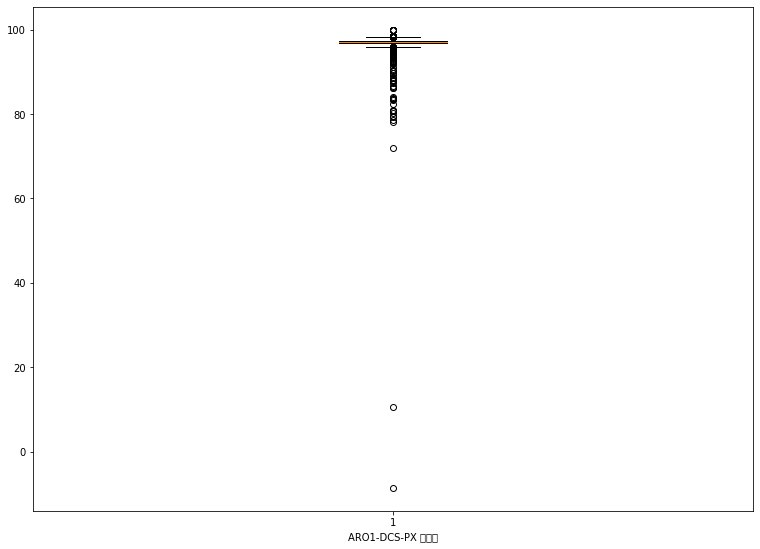

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("ARO1-DCS-PX 回收率")
bp = ax.boxplot(df_2["ARO1-DCS-PX 回收率"].dropna().values)
# bp = ax.boxplot([df_2["ARO1-DCS-AC_L2_A"].dropna().values, df_2["ARO1-DCS-AC_L3_A"].dropna().values, df_2["ARO1-DCS-AC_L4_A"].dropna().values,
#           df_2["ARO1-DCS-AC_A_FA"].dropna().values, df_2["ARO1-DCS-AC_HF"].dropna().values, df_2["ARO1-LIMS-s704-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s912-744-p-Xylene"].dropna().values, df_2["ARO1-LIMS-s912-744-m-Xylene"].dropna().values, df_2["ARO1-LIMS-s917-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s916-744-p-Xylene"].dropna().values, df_2["ARO1-DCS-PX 回收率"].dropna().values])
plt.show()

# plt.show()

In [17]:
# remove outliner
import numpy as np
for j in col:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO1-DCS-AC_L2_A 0.417803912998267 0.017590505705273117 0.3650323958824477 0.47057543011408637
ARO1-DCS-AC_L3_A 1.5456417064307622 0.07730284549205216 1.3137331699546058 1.7775502429069185
ARO1-DCS-AC_L4_A -0.5449967669510292 0.07757486576888639 -0.7777213642576883 -0.31227216964437
ARO1-DCS-AC_A_FA 0.4805147017745591 0.029839983270497642 0.3909947519630662 0.570034651586052
ARO1-DCS-AC_HF 119.82388368182146 4.8985940885526285 105.12810141616357 134.51966594747935
ARO1-LIMS-s704-744-p-Xylene 23.197589205759208 0.5982952484677339 21.402703460356005 24.99247495116241
ARO1-LIMS-s912-744-p-Xylene 122.02888304699479 1484.7050932654033 -4332.086396749215 4576.144162843204
ARO1-LIMS-s912-744-m-Xylene 1192.1063261448505 1741.18864057686 -4031.4595955857294 6415.672247875431
ARO1-LIMS-s917-744-p-Xylene 38.26085478106941 7.28148531062657 16.416398849189704 60.10531071294912
ARO1-LIMS-s916-744-p-Xylene 0.4747186436921328 2.0937390882059503 -5.806498620925718 6.755935908309984
ARO1-DCS-PX 回收率 96.8

In [24]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
0,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
1,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
2,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
3,0.429883,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
4,0.429839,1.540154,-0.510051,0.485000,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71443,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71444,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71445,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN
71446,0.398877,1.540062,-0.579923,0.482027,120.012001,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_3.describe()

,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,71359.000000,71359.000000,71359.000000,71359.000000,71359.000000,8920.000000,8920.000000,8920.000000,2973.000000,2973.000000,2888.000000
mean,0.417804,1.545642,-0.544997,0.480515,119.823884,23.197389,122.056273,1192.269238,38.261836,0.474576,96.850040
std,0.017591,0.077303,0.077575,0.029840,4.898594,0.598637,1485.620166,1742.255848,7.286335,2.095144,2.964948
min,0.232000,-0.076000,-2.347900,0.209000,0.000000,0.234000,0.063800,0.139300,0.189600,0.022000,-8.583796
25%,0.402927,1.540062,-0.579923,0.475000,120.012001,23.015575,99.716499,829.000000,36.397400,0.189200,96.738644
50%,0.419082,1.540154,-0.560056,0.475000,120.012001,23.200001,99.732300,1217.000000,39.210800,0.343800,97.069172
75%,0.428706,1.540154,-0.500050,0.482027,120.012001,23.362326,99.773804,1433.000000,42.819099,0.455500,97.322660
max,0.529678,2.116061,-0.220022,0.743777,129.987991,30.221600,99329.703125,89671.000000,50.292000,44.683201,100.000000


In [28]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,5:8]

,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene
count,8920.000000,8920.000000,8920.000000
mean,23.197389,122.056273,1192.269238
std,0.598637,1485.620166,1742.255848
min,0.234000,0.063800,0.139300
25%,23.015575,99.716499,829.000000
50%,23.200001,99.732300,1217.000000
75%,23.362326,99.773804,1433.000000
max,30.221600,99329.703125,89671.000000


<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [29]:
df_3_corr = df_3[col].corr()[y_col[:6]]
df_3_corr.iloc[:,:3]

,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene
ARO1-DCS-AC_L2_A,-0.126185,0.002075,-0.075384
ARO1-DCS-AC_L3_A,-0.127264,-0.001047,0.010829
ARO1-DCS-AC_L4_A,-0.036288,-0.002868,-0.058168
ARO1-DCS-AC_A_FA,-0.217450,-0.002764,0.024786
ARO1-DCS-AC_HF,0.092229,0.000579,-0.006061
ARO1-LIMS-s704-744-p-Xylene,1.000000,-0.001087,-0.060953
ARO1-LIMS-s912-744-p-Xylene,-0.001087,1.000000,-0.000783
ARO1-LIMS-s912-744-m-Xylene,-0.060953,-0.000783,1.000000
ARO1-LIMS-s917-744-p-Xylene,0.043231,0.012762,-0.054593
ARO1-LIMS-s916-744-p-Xylene,0.037759,0.002340,-0.003517


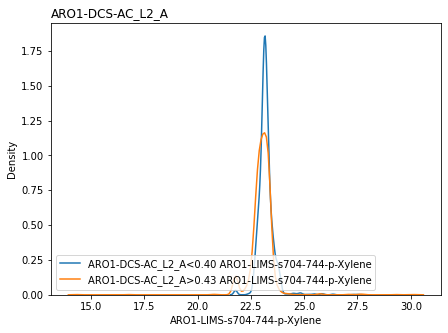

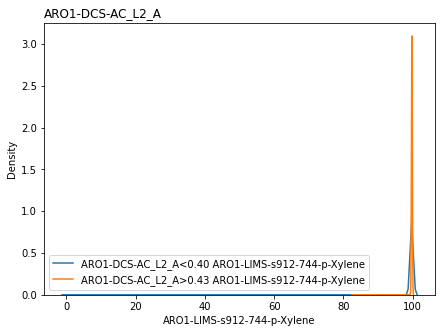

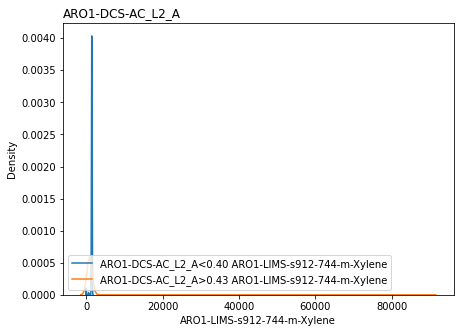

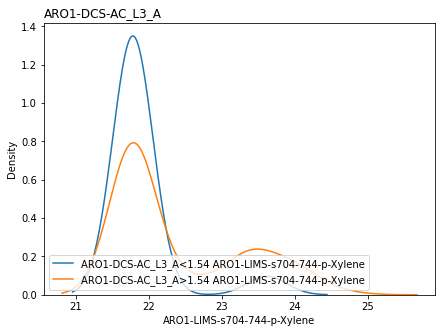

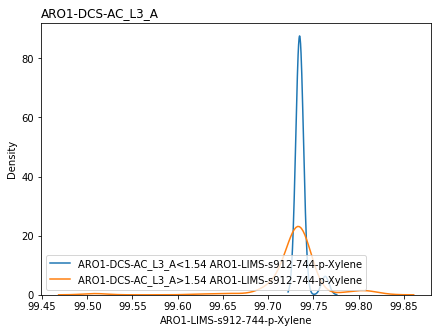

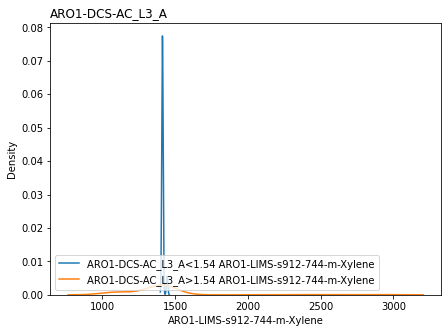

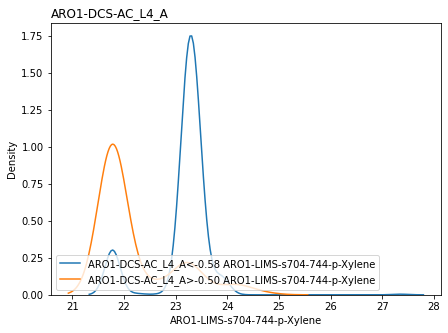

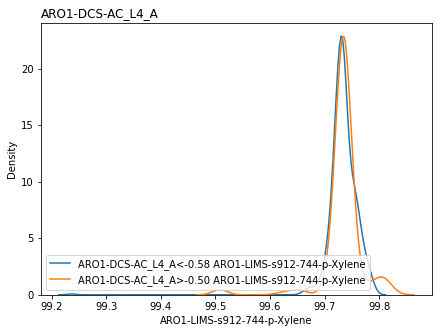

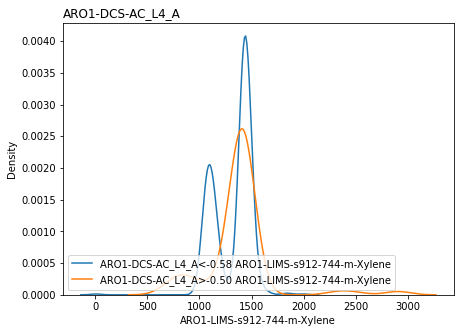

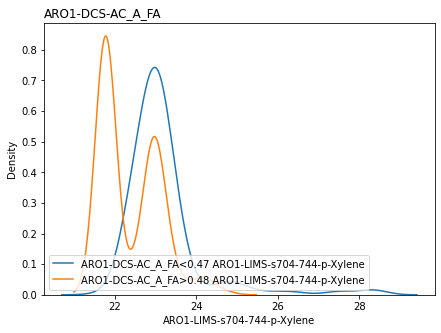

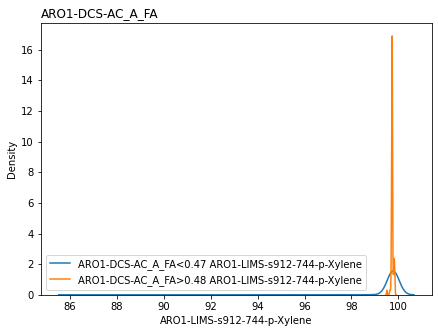

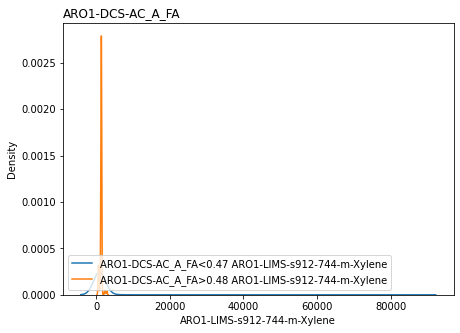

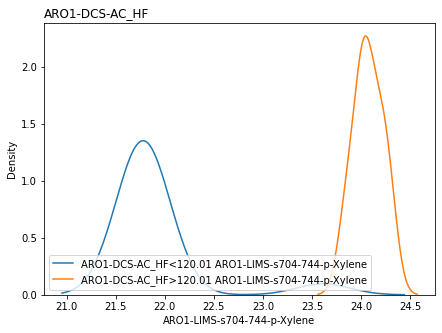

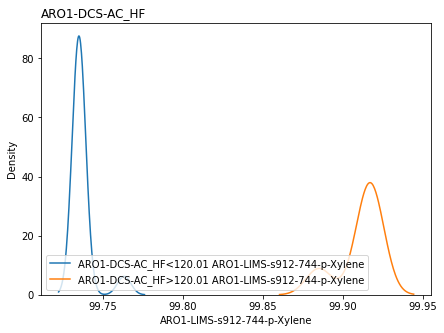

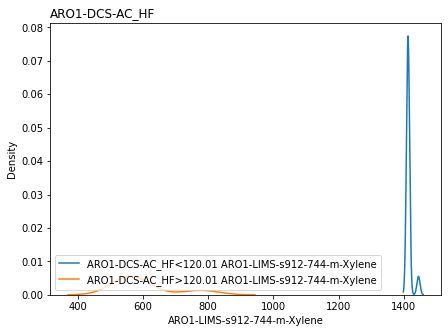

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

for i in x_col:
  for j in y_col[:3]:
    f, ax = plt.subplots(figsize = (7, 5))
    ax.set_title(i, loc = 'left')
    label_L = i + "<" + str("{:.2f}".format(df_3_describe.loc["25%", i])) + " "+ j
    label_U = i + ">" + str("{:.2f}".format(df_3_describe.loc["75%", i])) + " "+ j
    sb.kdeplot(df_3.loc[df_3[i] < df_3_describe.loc["25%", i], j], label = label_L)
    sb.kdeplot(df_3.loc[df_3[i] > df_3_describe.loc["75%", i], j], label = label_U)
    plt.legend(loc = "lower left")

xgboost

['ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L4_A'] : ARO1-LIMS-s704-744-p-Xylene
[06:03:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s704-744-p-Xylene 驗證分數:'

0.1948313838018756

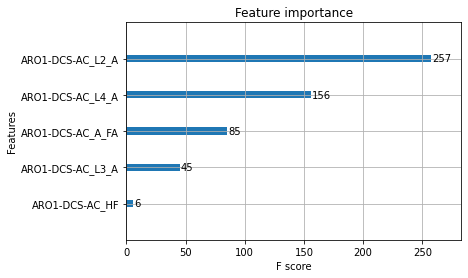

['ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_HF'] : ARO1-LIMS-s912-744-p-Xylene
[06:03:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-p-Xylene 驗證分數:'

-0.0005700749671651018

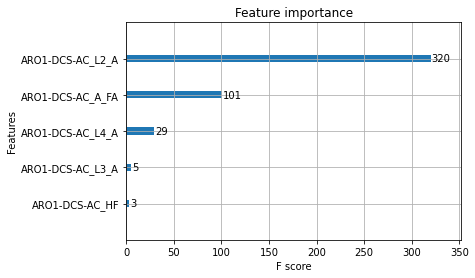

['ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_HF'] : ARO1-LIMS-s912-744-m-Xylene
[06:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-m-Xylene 驗證分數:'

0.006252515528194502

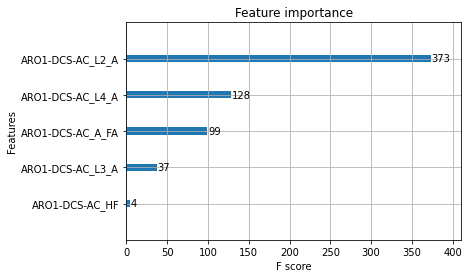

In [31]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

for i in y_col[:3]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [32]:
df_3_1_24_corr = df_3[col].corr()[y_col[:6]]
df_3_1_24_corr.iloc[:,3:6]

,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
ARO1-DCS-AC_L2_A,0.075951,0.020261,-0.045140
ARO1-DCS-AC_L3_A,-0.038237,0.015562,-0.018523
ARO1-DCS-AC_L4_A,0.015191,0.015008,-0.033893
ARO1-DCS-AC_A_FA,-0.053464,0.019423,0.001997
ARO1-DCS-AC_HF,-0.010789,-0.001701,-0.037181
ARO1-LIMS-s704-744-p-Xylene,0.043231,0.037759,-0.332442
ARO1-LIMS-s912-744-p-Xylene,0.012762,0.002340,0.663591
ARO1-LIMS-s912-744-m-Xylene,-0.054593,-0.003517,-0.067267
ARO1-LIMS-s917-744-p-Xylene,1.000000,-0.257893,0.027611
ARO1-LIMS-s916-744-p-Xylene,-0.257893,1.000000,-0.454374


In [33]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,8:11]

,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,2973.000000,2973.000000,2888.000000
mean,38.261836,0.474576,96.850040
std,7.286335,2.095144,2.964948
min,0.189600,0.022000,-8.583796
25%,36.397400,0.189200,96.738644
50%,39.210800,0.343800,97.069172
75%,42.819099,0.455500,97.322660
max,50.292000,44.683201,100.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

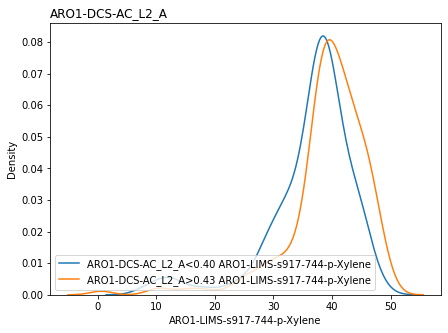

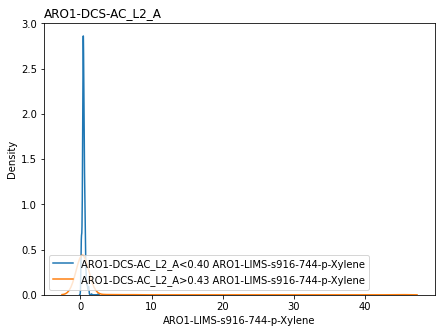

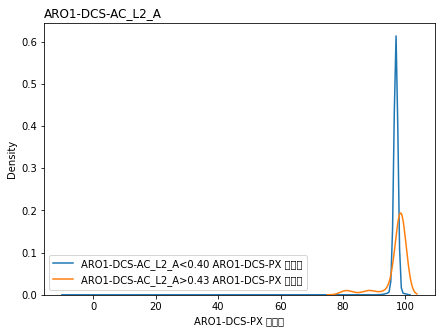

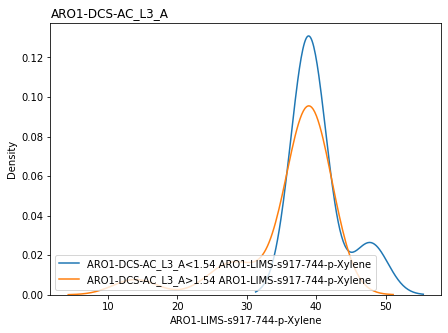

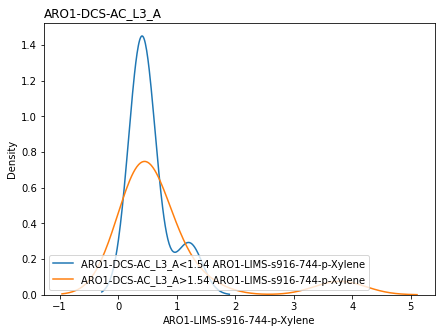

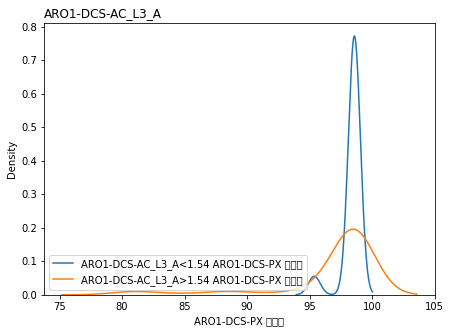

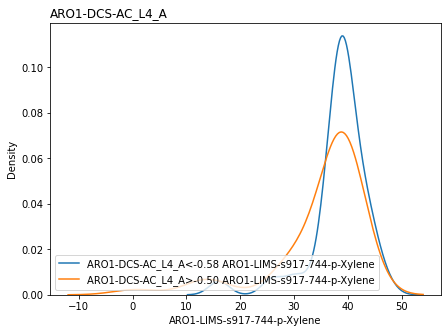

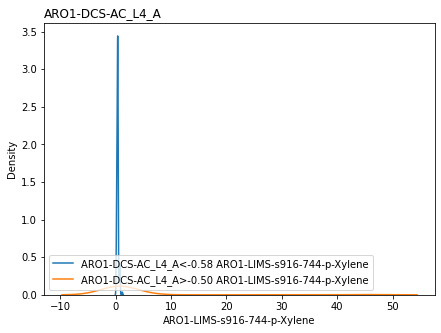

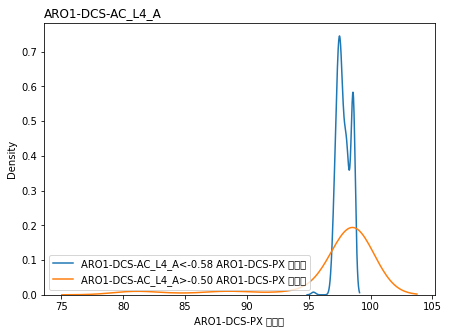

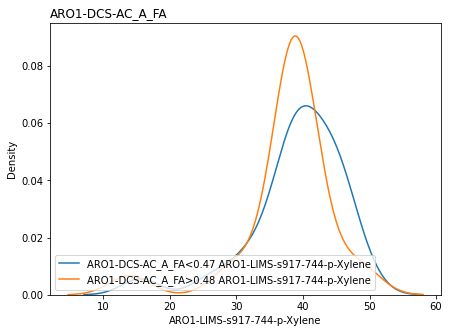

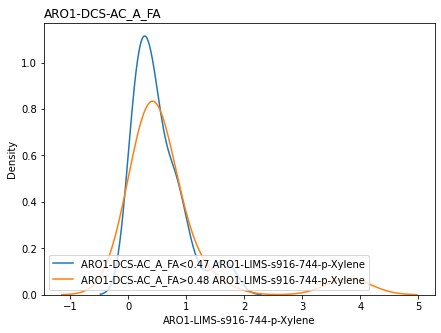

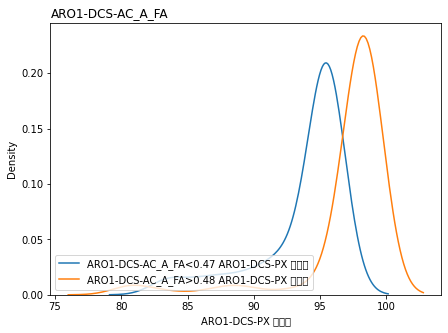

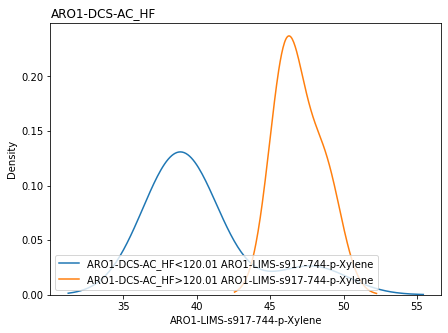

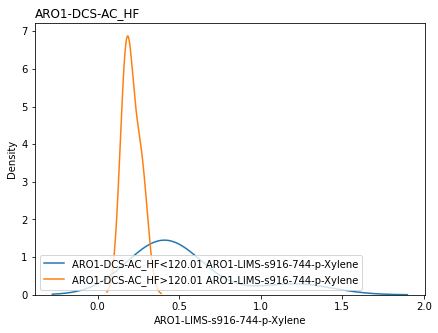

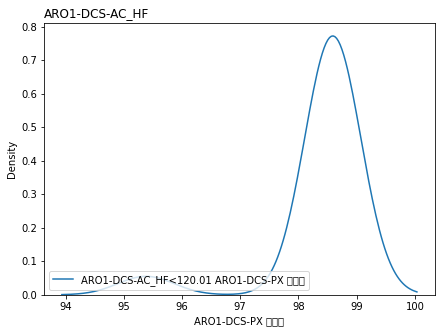

In [34]:
for i in x_col:
  for j in y_col[3:6]:
    f, ax = plt.subplots(figsize = (7, 5))
    ax.set_title(i, loc = 'left')
    label_L = i + "<" + str("{:.2f}".format(df_3_1_24_describe.loc["25%", i])) + " "+ j
    label_U = i + ">" + str("{:.2f}".format(df_3_1_24_describe.loc["75%", i])) + " "+ j
    sb.kdeplot(df_3.loc[df_3[i] < df_3_1_24_describe.loc["25%", i], j], label = label_L)
    sb.kdeplot(df_3.loc[df_3[i] > df_3_1_24_describe.loc["75%", i], j], label = label_U)
    plt.legend(loc = "lower left")

xgboost

['ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_HF'] : ARO1-LIMS-s917-744-p-Xylene
[06:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s917-744-p-Xylene 驗證分數:'

0.03958574927537695

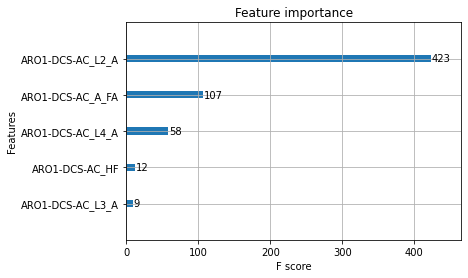

['ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_HF'] : ARO1-LIMS-s916-744-p-Xylene
[06:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s916-744-p-Xylene 驗證分數:'

-0.002983045859211053

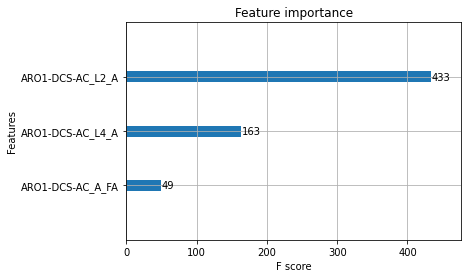

['ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_A_FA'] : ARO1-DCS-PX 回收率
[06:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PX 回收率 驗證分數:'

0.5867196401986337

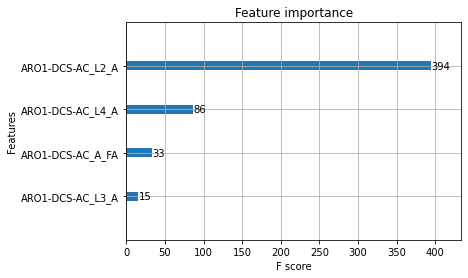

In [35]:
for i in y_col[3:6]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()